# **CS-328 2024-25: Writing Assignment**

# **World Inequality and How it has changed?**

- Darshi Doshi (21110050)
-Divya Madineni (21110115)
-Shreya Patel (21110155)
- Saumya Jaiswal (21110186)
- Vinod Kumar Reddy(23110178)


## **Introduction**

Inequality—across income, wealth, gender, and carbon emissions—remains a major global challenge. While economic growth has reduced poverty for many, its benefits are unevenly distributed. Understanding these disparities is essential for effective policy.

## **About the Dataset**

The World Inequality Database (WID) is an open-access resource that tracks the historical evolution of inequality within and between countries. It provides harmonized data on key indicators, including:

- Income inequality

- Wealth inequality

- Carbon emissions by the top 10%

- Female labour income share

## **Data Summary**

### Average Income

Average national income per adult, adjusted for purchasing power, is a key indicator of economic well-being and cross-country comparison.

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Load data, skipping metadata
df = pd.read_csv("/content/WID_Data_avg_national_inc.csv", sep=";", skiprows=1)

# Rename columns manually
df.columns = [
    'Year', 'USA', 'France', 'Germany', 'India', 'China',
    'Brazil', 'South Africa', 'Japan', 'Sweden', 'Australia', 'World'
]

# Convert everything to numeric (in case some values are strings)
df = df.apply(pd.to_numeric, errors='coerce')

# Initialize interactive figure
fig = go.Figure()

# Add one trace per country
for country in df.columns[1:]:
    fig.add_trace(go.Scatter(
        x=df['Year'],
        y=df[country],
        mode='lines+markers',
        name=country,
        hovertemplate='%{x}<br>' + country + ': %{y:,.0f} USD<extra></extra>'
    ))

# Layout customization
fig.update_layout(
    title='National Income per Adult (1980–2023, PPP, Constant 2023 USD)',
    xaxis_title='Year',
    yaxis_title='Income per Adult (USD)',
    hovermode='closest',
    template='plotly_white',
    legend=dict(title='Country'),
    width=1100,
    height=600
)

# Show the interactive plot
fig.show()

Over recent decades, global average income has gradually increased, driven by strong growth in emerging economies like China and India. However, large disparities persist: advanced economies such as the US, Australia, and Western European countries maintain much higher income levels and show resilience to global shocks, while China has rapidly closed the gap since 2000, and India’s growth, though steady, remains slower. Despite overall progress, the richest 10% still capture over half of global income, and the poorest 50% receive less than one-fifth, highlighting persistent inequality.

### Income Shares

Income share indicators measure the proportion of total national income received by different population groups, revealing the extent of economic inequality. The shares held by the top 10%, top 1%, and bottom 50% highlight how income is distributed between the wealthiest and the majority.

In [ ]:
import pandas as pd
import plotly.express as px

# Load the CSV with ; separator and skip the first row
df = pd.read_csv('/content/WID_Data_inc_share.csv', sep=';', skiprows=1)

# Mapping to friendly names
country_map = {
    'US': 'United States',
    'FR': 'France',
    'DE': 'Germany',
    'IN': 'India',
    'CN': 'China',
    'BR': 'Brazil',
    'ZA': 'South Africa',
    'JP': 'Japan',
    'SE': 'Sweden',
    'AU': 'Australia',
    'WO': 'World'
}

group_map = {
    'p99p100': 'Top 1%',
    'p90p100': 'Top 10%',
    'p0p50': 'Bottom 50%'
}

# Extract 'year' column
years = df.iloc[:, 0]
df = df.drop(columns=df.columns[0])  # Drop year from main df, we’ll add back after melt

# Prepare a long-form DataFrame
df_long = df.copy()
df_long['year'] = years

# Melt the dataframe to long format
df_long = df_long.melt(id_vars='year', var_name='column', value_name='Share')

# Parse group and country from column names
df_long['Group'] = df_long['column'].str.extract(r'p(\d+p\d+)', expand=False).apply(lambda x: 'p' + x)
df_long['Country_Code'] = df_long['column'].str.extract(r'_([A-Z]{2})$', expand=False)

# Map readable labels
df_long['Income Group'] = df_long['Group'].map(group_map)
df_long['Country'] = df_long['Country_Code'].map(country_map)

# Drop rows with missing mappings
df_long = df_long.dropna(subset=['Income Group', 'Country'])

# Convert share values to float (may be strings due to separator)
df_long['Share'] = pd.to_numeric(df_long['Share'], errors='coerce')
df_long = df_long.dropna(subset=['Share'])

# Final DataFrame for plotting
plot_df = df_long[['year', 'Country', 'Income Group', 'Share']]

# Create animated stacked bar chart
fig = px.bar(plot_df,
             x='Country',
             y='Share',
             color='Income Group',
             animation_frame='year',
             title='Animated Stacked Bar Chart: Income Shares by Country Over Time',
             labels={'Country': 'Country', 'Share': 'Income Share (%)'},
             category_orders={'Income Group': ['Top 1%', 'Top 10%', 'Bottom 50%']})

fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})
fig.show()


Income is heavily concentrated among the top 10% and especially the top 1% in most countries, with the bottom 50% receiving a much smaller share. Inequality is most severe in Brazil, South Africa, India, and at the global level, while countries like Sweden and France exhibit more equitable income distributions.

### Average Wealth

The average wealth per adult is a key measure of economic prosperity and the distribution of assets within a country.

In [ ]:
import pandas as pd
import plotly.express as px

# Load the CSV file (semicolon-separated, skip metadata row)
df = pd.read_csv('/content/WID_Data_avg_wealth.csv', sep=';', skiprows=1)

# Define countries and their full names
countries = {
    'US': 'United States',
    'SE': 'Sweden',
    'FR': 'France',
    'DE': 'Germany',
    'IN': 'India',
    'CN': 'China',
    'BR': 'Brazil',
    'ZA': 'South Africa',
    'AU': 'Australia',
    'JP': 'Japan',
    'WO': 'World'
}

# Prepare data for plotting
wealth_data = []

for country_code, country_name in countries.items():
    col_name = f'anweal_pall_992_i_{country_code}'
    if col_name in df.columns:
        temp_df = pd.DataFrame({
            'Year': df['Year'],
            'Country': country_name,
            'Avg Wealth per Adult (USD)': df[col_name]
        })
        wealth_data.append(temp_df)

# Combine all country data into a single DataFrame
plot_df = pd.concat(wealth_data, ignore_index=True).dropna()

# Create the animated bar chart race using Plotly Express
fig = px.bar(
    plot_df,
    x='Avg Wealth per Adult (USD)',
    y='Country',
    color='Country',
    animation_frame='Year',
    orientation='h',  # Horizontal bars
    text='Avg Wealth per Adult (USD)',
    labels={'Avg Wealth per Adult (USD)': 'Avg Wealth per Adult (USD)'},
    title='Average Wealth per Adult Over Time by Country'
)

# Update layout for better visualization
fig.update_layout(
    height=600,
    width=1000,
    xaxis=dict(range = [0,450000],title='Avg Wealth per Adult (USD)', tickprefix='$'),
    yaxis=dict(title='Country'),
    template='plotly_white',
    coloraxis_showscale=False  # Hide color scale
)

# Improve animation settings
fig.update_traces(texttemplate='%{x:.2f}', textposition='outside')
fig.update_layout(
    updatemenus=[{
        "buttons": [
            {
                "args": [None, {"frame": {"duration": 800, "redraw": True}, "fromcurrent": True}],
                "label": "Play",
                "method": "animate"
            },
            {
                "args": [[None], {"frame": {"duration": 0, "redraw": True}, "mode": "immediate",
                                  "transition": {"duration": 0}}],
                "label": "Pause",
                "method": "animate"
            }
        ],
        "direction": "left",
        "pad": {"r": 10, "t": 87},
        "showactive": False,
        "type": "buttons",
        "x": 0.1,
        "xanchor": "right",
        "y": 0,
        "yanchor": "top"
    }]
)

# Show the plot
fig.show()

In 2023, average adult wealth exceeds \$300,000 in Australia, the US, and Japan, while Sweden, France, and Germany trail at \$200,000–\$250,000. China surged to \$140,000 (+400% since 2000), contrasting sharply with India (\$15,000), Brazil (\$40,000), and South Africa (\$65,000). Wealth remains concentrated in advanced economies, despite growth in emerging markets.

### Wealth Income Ratio

The wealth income ratio shows how much larger total wealth is compared to annual income, highlighting the degree of wealth accumulation in a country.

In [ ]:
import pandas as pd
import plotly.express as px

# Load the CSV file (semicolon-separated, skip 1 row)
df = pd.read_csv('/content/WID_Data_WealthInco_Ratio.csv', sep=';', skiprows=1)

# Convert Year to numeric to ensure proper ordering
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Define countries and their column names
countries = ['US', 'SE', 'FR', 'DE', 'IN', 'CN', 'BR', 'ZA', 'AU', 'JP', 'WO']
country_names = {
    'US': 'United States', 'SE': 'Sweden', 'FR': 'France', 'DE': 'Germany', 'IN': 'India',
    'CN': 'China', 'BR': 'Brazil', 'ZA': 'South Africa', 'AU': 'Australia', 'JP': 'Japan', 'WO': 'World'
}

# Extract wealth-income ratio columns for the specified countries
wealth_income_data = []

for country in countries:
    wealth_col = f'wwealn_pall_999_i_{country}'
    if wealth_col in df.columns:
        sub_df = pd.DataFrame({
            'Year': df['Year'],
            'Country': country_names[country],
            'Wealth_Income_Ratio': df[wealth_col]
        })
        wealth_income_data.append(sub_df)

# Concatenate all into one dataframe
heatmap_df = pd.concat(wealth_income_data, ignore_index=True)

# Remove rows with missing or NaN values
heatmap_df.dropna(inplace=True)

# Pivot the data to get it in the right format for the heatmap
# Sort by Year first to ensure proper ordering
heatmap_df = heatmap_df.sort_values(by='Year')
pivot_df = heatmap_df.pivot(index='Country', columns='Year', values='Wealth_Income_Ratio')

# Create the heatmap using px.imshow
fig = px.imshow(
    pivot_df,
    labels=dict(x="Year", y="Country", color="Wealth-Income Ratio"),
    color_continuous_scale="Viridis",
    title="Wealth-Income Ratio by Country and Year",
    text_auto='.2f'  # Show values in each cell with 2 decimal places
)

# Improve layout
fig.update_layout(
    height=700,
    width=1200,
    xaxis_title="Year",
    yaxis_title="Country",
    coloraxis_colorbar=dict(
        title="Wealth-Income<br>Ratio",
        titleside="right"
    )
)

# Add hover information
fig.update_traces(
    hovertemplate="Country: %{y}<br>Year: %{x}<br>Wealth-Income Ratio: %{z:.2f}<extra></extra>"
)

# Show plot
fig.show()

In 2023, advanced economies like Australia, Germany, France, Sweden, and the USA have high wealth-income ratios, meaning wealth far exceeds annual income. Emerging economies such as India, Brazil, and South Africa have much lower ratios, reflecting less accumulated wealth relative to income. China’s ratio is rising quickly, nearing advanced economy levels. Overall, these gaps highlight persistent global disparities in wealth accumulation.

### Wealth Share

The difference between the wealth share of the top 10% and the bottom 50% shows how much more of a country's wealth is held by the richest compared to the poorer half of the population.

In [ ]:
import pandas as pd
import plotly.express as px

# Load CSV (semicolon-separated)
df = pd.read_csv('/content/WID_Data_wealth_share.csv', sep=';', skiprows=1)

# Define countries and their full names
countries = {
    'US': 'United States',
    'SE': 'Sweden',
    'FR': 'France',
    'DE': 'Germany',
    'IN': 'India',
    'CN': 'China',
    'BR': 'Brazil',
    'ZA': 'South Africa',
    'AU': 'Australia',
    'JP': 'Japan',
    'WO': 'World'
}

# Prepare data for plotting
inequality_data = []

for country_code, country_name in countries.items():
    top_col = f'shweal_p90p100_z_{country_code}'
    bottom_col = f'shweal_p0p50_z_{country_code}'

    # Check if columns exist in dataframe
    if top_col in df.columns and bottom_col in df.columns:
        temp_df = pd.DataFrame({
            'Year': df['Year'],
            'Country': country_name,
            'Inequality Index': df[top_col] - df[bottom_col]
        })
        inequality_data.append(temp_df)

# Combine all country data
plot_df = pd.concat(inequality_data, ignore_index=True).dropna()

# Custom color sequence for countries
color_sequence = [
    '#1f77b4',  # US - blue
    '#ff7f0e',  # Sweden - orange
    '#2ca02c',  # France - green
    '#d62728',  # Germany - red
    '#9467bd',  # India - purple
    '#8c564b',  # China - brown
    '#e377c2',  # Brazil - pink
    '#7f7f7f',  # South Africa - gray
    '#bcbd22',  # Australia - yellow-green
    '#17becf',  # Japan - cyan
    '#000000'   # World - black
]

# Create interactive plot
fig = px.line(
    plot_df,
    x='Year',
    y='Inequality Index',
    color='Country',
    labels={'Inequality Index': 'Wealth Inequality Index (Top 10% - Bottom 50%)'},
    title='Wealth Inequality Trends (1995-2023)',
    color_discrete_sequence=color_sequence
)

# Update layout (key change here)
fig.update_layout(
    height=600,
    width=1000,
    hovermode='closest',  # Changed from 'x unified' to 'closest'
    legend=dict(
        title='Countries',
        orientation='h',
        yanchor='bottom',
        y=1.02,
        xanchor='right',
        x=1
    ),
    yaxis=dict(
        range=[0, 1.2],
        ticksuffix='%'
    )
)

# Update hover template (more focused info)
fig.update_traces(
    hovertemplate='<b>%{fullData.name}</b><br>Year: %{x}<br>Inequality Index: %{y:.1f}%<extra></extra>'
)

# Show plot
fig.show()

The US, Brazil, and South Africa show the largest wealth gaps between the top 10% and bottom 50%, reflecting extreme concentration. Sweden and France have the smallest gaps, indicating more balanced distribution. China and India have moderate but persistent disparities, with China’s gap stabilizing and India’s remaining high. Globally, wealth inequality remains substantial.

###  Top 10% Carbon Emitters

The top 10% carbon emission share measures the proportion of total greenhouse gas emissions produced by the wealthiest 10% of the population, highlighting the link between inequality and environmental impact.

In [ ]:
import pandas as pd
import plotly.express as px

# Load the CSV file (semicolon-separated)
df = pd.read_csv('/content/WID_Data_carbon_em.csv', sep=';',skiprows=1)

# Convert Year to numeric
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Define countries and their full names
countries = {
    'US': 'United States',
    'SE': 'Sweden',
    'FR': 'France',
    'DE': 'Germany',
    'IN': 'India',
    'CN': 'China',
    'BR': 'Brazil',
    'ZA': 'South Africa',
    'AU': 'Australia',
    'JP': 'Japan'
}

# Prepare emission data
emission_data = []

for country_code, country_name in countries.items():
    col_name = f'lpfghg_p90p100_z_{country_code}'
    if col_name in df.columns:
        temp_df = pd.DataFrame({
            'Year': df['Year'],
            'Country': country_name,
            'Emission Share (%)': df[col_name]  # No need to multiply by 100; values are already percentages
        })
        emission_data.append(temp_df)

# Combine all country data into a single DataFrame
plot_df = pd.concat(emission_data, ignore_index=True).dropna()

# Custom color sequence for countries
colors = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
    '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
    '#bcbd22', '#17becf'
]

# Create interactive line graph using Plotly Express
fig = px.line(
    plot_df,
    x='Year',
    y='Emission Share (%)',
    color='Country',
    labels={'Emission Share (%)': 'Top 10% Emitters Share (%)'},
    title='Share of Carbon Emissions from Top 10% Emitters (1995-2019)',
    color_discrete_sequence=colors
)

# Update layout for better visualization
fig.update_layout(
    height=600,
    width=1000,
    hovermode='closest',
    legend=dict(
        title='Countries',
        orientation='h',
        yanchor='bottom',
        y=1.02,
        xanchor='right',
        x=1
    ),
    yaxis=dict(
        range=[0, 100],  # Assuming percentages (0-100 scale)
        ticksuffix='%'
    ),
    xaxis=dict(
        title='Year'
    )
)

# Customize hover information
fig.update_traces(
    hovertemplate='<b>%{fullData.name}</b><br>Year: %{x}<br>Emission Share: %{y:.2f}%<extra></extra>'
)

# Show plot
fig.show()

The top 10% in the US and Australia account for 60–80% of emissions, far exceeding Sweden/France (25–35%). China’s top 10% share rose from 15% (1990) to 35% (2023), mirroring its economic expansion. Brazil and South Africa show moderate increases (40–50%), reflecting development patterns where elite consumption drives emissions growth.

### Female Labor Income Share

The female labour income share measures the proportion of total labour income earned by women, serving as a direct indicator of gender equality in the workforce.

In [ ]:
import pandas as pd
import plotly.express as px

# Load the CSV file and skip metadata row
file_path = '/content/WID_Data_FemShare.csv'
df = pd.read_csv(file_path, sep=';', skiprows=1)

# Define countries and their full names
countries = {
    'US': 'United States',
    'SE': 'Sweden',
    'FR': 'France',
    'DE': 'Germany',
    'IN': 'India',
    'CN': 'China',
    'BR': 'Brazil',
    'ZA': 'South Africa',
    'AU': 'Australia',
    'JP': 'Japan',
    'WO': 'World'
}

# Prepare female labor share data
female_labor_data = []

for country_code, country_name in countries.items():
    col_name = f'spllin_p0p100_992_f_{country_code}'
    if col_name in df.columns:
        temp_df = pd.DataFrame({
            'Year': df['Year'],
            'Country': country_name,
            'Female Labor Share (%)': df[col_name] * 100  # Convert to percentage
        })
        female_labor_data.append(temp_df)

# Combine all country data into a single DataFrame
plot_df = pd.concat(female_labor_data, ignore_index=True).dropna()

# Custom color sequence for countries
colors = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
    '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
    '#bcbd22', '#17becf', '#000000'
]

# Create interactive line graph using Plotly Express
fig = px.line(
    plot_df,
    x='Year',
    y='Female Labor Share (%)',
    color='Country',
    labels={'Female Labor Share (%)': 'Female Labor Share (%)'},
    title='Female Labor Share Across Countries (1995-2023)',
    color_discrete_sequence=colors
)

# Update layout for better visualization
fig.update_layout(
    height=600,
    width=1000,
    hovermode='closest',
    legend=dict(
        title='Countries',
        orientation='h',
        yanchor='bottom',
        y=1.02,
        xanchor='right',
        x=1
    ),
    yaxis=dict(
        range=[0, 50],  # Adjust based on your data range
        ticksuffix='%'
    ),
    xaxis=dict(
        title='Year'
    )
)

# Customize hover information
fig.update_traces(
    hovertemplate='<b>%{fullData.name}</b><br>Year: %{x}<br>Female Labor Share: %{y:.2f}%<extra></extra>'
)

# Show plot
fig.show()

Sweden leads in female labour income share, with France and Australia close behind. The US, Germany, and South Africa have moderate, stable shares. China’s share has declined, while India and Brazil remain lowest with little change. Worldwide, women earn less than 30% of labour income, highlighting ongoing gender gaps despite some progress.

## **Hypotheses**


Based on the datasets provided, several key hypotheses emerge regarding global inequality dynamics listing a few on which we have focused here :

### **Hypothesis 1:** Income inequality has increased globally over time.

In [ ]:
# Clean and extract structured data from the metadata shown as H1.csv
import pandas as pd
import re
from io import StringIO


# Read the raw file line by line
with open("/content/H1.csv", "r", encoding="utf-8") as f:
    lines = f.readlines()

# Step 1: Find starting indices for each country block using the pattern "sptinc_z_XX"
country_blocks = []
for i, line in enumerate(lines):
    if re.search(r'sptinc_z_([A-Z]{2})', line):
        country_code = re.findall(r'sptinc_z_([A-Z]{2})', line)[0]
        country_blocks.append((i, country_code))

# Step 2: Extract and parse each country's data block
all_data = []

for idx, (start_idx, country_code) in enumerate(country_blocks):
    # The actual data starts 3 lines after the header (pattern observed in WID exports)
    data_start = start_idx + 3

    # Data ends either at the start of the next block or end of file
    data_end = country_blocks[idx + 1][0] if idx + 1 < len(country_blocks) else len(lines)

    # Clean and collect valid semicolon-separated lines from this block
    for line in lines[data_start:data_end]:
        parts = [p.strip().replace('"', '') for p in line.strip().split(";")]
        if len(parts) >= 3:
            try:
                year = int(parts[1])
                value = float(parts[2])
                all_data.append({
                    "country_code": country_code,
                    "percentile": parts[0],
                    "year": year,
                    "income_share": value * 100  # convert to %
                })
            except:
                continue  # skip malformed lines

# Step 3: Create a clean DataFrame
df = pd.DataFrame(all_data)

# Optional: Map country codes to readable names (add more if needed)
country_map = {
    "IN": "India", "US": "United States", "DE": "Germany", "FR": "France",
    "CN": "China", "BR": "Brazil", "ZA": "South Africa", "JP": "Japan",
    "SE": "Sweden", "AU": "Australia"
}
df["country"] = df["country_code"].map(country_map)

# Rearrange columns
df = df[["country", "year", "percentile", "income_share"]].dropna()

# Preview
print(df.head())


     country  year percentile  income_share
0  Australia  1990    p90p100         33.49
1  Australia  1991    p90p100         34.10
2  Australia  1992    p90p100         35.06
3  Australia  1993    p90p100         36.71
4  Australia  1994    p90p100         38.24


In [ ]:
!pip install openpyxl

In [ ]:
import pandas as pd

def clean_and_sort_excel_for_inequality(input_path, output_path):
    # Load the raw Excel file
    df_raw = pd.read_excel(input_path)

    # Step 1: Clean column headers to keep only readable country names
    clean_columns = {}
    for col in df_raw.columns:
        if isinstance(col, str):
            parts = col.split("\n")
            name = parts[1].strip() if len(parts) >= 2 else col
            clean_columns[col] = name
        else:
            clean_columns[col] = col
    df_cleaned = df_raw.rename(columns=clean_columns)

    # Step 2: Rename first column to 'Year' if needed
    if df_cleaned.columns[0] != "Year":
        df_cleaned = df_cleaned.rename(columns={df_cleaned.columns[0]: "Year"})

    # Step 3: Ensure 'Year' column is numeric and sorted
    df_cleaned["Year"] = pd.to_numeric(df_cleaned["Year"], errors="coerce")
    df_cleaned = df_cleaned.dropna(subset=["Year"]).sort_values("Year")

    # Step 4: Sort country columns alphabetically (excluding 'Year')
    country_columns = sorted([col for col in df_cleaned.columns if col != "Year"])
    df_sorted = df_cleaned[["Year"] + country_columns]

    # Step 5: Save cleaned and sorted DataFrame
    df_sorted.to_excel(output_path, index=False)
    print(f"✅ Cleaned and sorted Excel file saved to: {output_path}")

# ✅ Usage
input_file = "50_xl.xlsx"
output_file = "50_xl_Cleaned_Sorted.xlsx"
clean_and_sort_excel_for_inequality(input_file, output_file)


✅ Cleaned and sorted Excel file saved to: 50_xl_Cleaned_Sorted.xlsx


In [ ]:
import pandas as pd

def clean_and_sort_excel_for_inequality(input_path, output_path):
    # Load the raw Excel file
    df_raw = pd.read_excel(input_path)

    # Step 1: Clean column headers to keep only readable country names
    clean_columns = {}
    for col in df_raw.columns:
        if isinstance(col, str):
            parts = col.split("\n")
            name = parts[1].strip() if len(parts) >= 2 else col
            clean_columns[col] = name
        else:
            clean_columns[col] = col
    df_cleaned = df_raw.rename(columns=clean_columns)

    # Step 2: Rename first column to 'Year' if needed
    if df_cleaned.columns[0] != "Year":
        df_cleaned = df_cleaned.rename(columns={df_cleaned.columns[0]: "Year"})

    # Step 3: Ensure 'Year' column is numeric and sorted
    df_cleaned["Year"] = pd.to_numeric(df_cleaned["Year"], errors="coerce")
    df_cleaned = df_cleaned.dropna(subset=["Year"]).sort_values("Year")

    # Step 4: Sort country columns alphabetically (excluding 'Year')
    country_columns = sorted([col for col in df_cleaned.columns if col != "Year"])
    df_sorted = df_cleaned[["Year"] + country_columns]

    # Step 5: Save cleaned and sorted DataFrame
    df_sorted.to_excel(output_path, index=False)
    print(f"✅ Cleaned and sorted Excel file saved to: {output_path}")

# ✅ Usage
input_file = "10_xl.xlsx"
output_file = "10_xl_Cleaned_Sorted.xlsx"
clean_and_sort_excel_for_inequality(input_file, output_file)


✅ Cleaned and sorted Excel file saved to: 10_xl_Cleaned_Sorted.xlsx


Top 10 % Income Share Over Time

In [ ]:
import pandas as pd
import plotly.graph_objects as go
import plotly.colors as pc
import plotly.io as pio
pio.renderers.default = "notebook"

# Load cleaned + sorted Excel file
df = pd.read_excel("10_xl_Cleaned_Sorted.xlsx")

# Step 1: Filter PPP countries (exclude '-MER')
ppp_columns = [col for col in df.columns if "-MER" not in col and col != "Year"]
df_ppp = df[["Year"] + ppp_columns]

# Step 2: Define top 10 countries
top_10_countries = [
    "United States", "France", "Germany", "India", "China",
    "Brazil", "South Africa", "Japan", "Sweden", "Australia"
]

# Step 3: Assign colors to each of the 10 countries
color_palette = pc.qualitative.Plotly + pc.qualitative.D3
country_colors = {country: color_palette[i % len(color_palette)] for i, country in enumerate(top_10_countries)}

# Step 4: Compute global average (excluding NaNs)
df_ppp["Global Average"] = df_ppp.drop(columns="Year").mean(axis=1, skipna=True)

# Step 5: Build hover text with values rounded to 3 decimal places
hover_text = []
for _, row in df_ppp.iterrows():
    text = f"<b>Year:</b> {int(row['Year'])}<br><b>Global Avg:</b> <span style='color:crimson'>{row['Global Average']:.3f}%</span><br><br>"
    for country in top_10_countries:
        if country in df_ppp.columns and pd.notna(row[country]):
            color = country_colors.get(country, "#666666")
            text += f"<span style='color:{color}'><b>{country}</b>: {row[country]:.3f}%</span><br>"
    hover_text.append(text)

# Step 6: Plot with Plotly
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=df_ppp["Year"],
    y=df_ppp["Global Average"],
    mode="lines+markers",
    name="Global Average",
    hovertext=hover_text,
    hoverinfo="text",
    line=dict(color="crimson", width=3),
    marker=dict(size=6)
))

fig.update_layout(
    title="Global Average Top 10% Income Share Over Time (PPP Countries Only)",
    xaxis_title="Year",
    yaxis_title="Income Share (%)",
    template="plotly_white",
    hoverlabel=dict(bgcolor="white", font_size=13, font_family="Arial")
)

# Save and open
fig.write_html("top10_share_ppp_colored_hover_3dp.html", auto_open=True)
fig.show(renderer="colab")


Bottom 50 % Income Share over time

In [ ]:
import pandas as pd
import plotly.graph_objects as go
import plotly.colors as pc

# Load cleaned + sorted Excel file
df = pd.read_excel("50_xl_Cleaned_Sorted.xlsx")

# Step 1: Filter PPP countries (exclude '-MER')
ppp_columns = [col for col in df.columns if "-MER" not in col and col != "Year"]
df_ppp = df[["Year"] + ppp_columns]

# Step 2: Define top 10 countries
top_10_countries = [
    "United States", "France", "Germany", "India", "China",
    "Brazil", "South Africa", "Japan", "Sweden", "Australia"
]

# Step 3: Assign colors to each of the 10 countries
color_palette = pc.qualitative.Plotly + pc.qualitative.D3
country_colors = {country: color_palette[i % len(color_palette)] for i, country in enumerate(top_10_countries)}

# Step 4: Compute global average (excluding NaNs)
df_ppp["Global Average"] = df_ppp.drop(columns="Year").mean(axis=1, skipna=True)

# Step 5: Build hover text with values rounded to 3 decimal places
hover_text = []
for _, row in df_ppp.iterrows():
    text = f"<b>Year:</b> {int(row['Year'])}<br><b>Global Avg:</b> <span style='color:crimson'>{row['Global Average']:.3f}%</span><br><br>"
    for country in top_10_countries:
        if country in df_ppp.columns and pd.notna(row[country]):
            color = country_colors.get(country, "#666666")
            text += f"<span style='color:{color}'><b>{country}</b>: {row[country]:.3f}%</span><br>"
    hover_text.append(text)

# Step 6: Plot with Plotly
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=df_ppp["Year"],
    y=df_ppp["Global Average"],
    mode="lines+markers",
    name="Global Average",
    hovertext=hover_text,
    hoverinfo="text",
    line=dict(color="crimson", width=3),
    marker=dict(size=6)
))

fig.update_layout(
    title="Global Average Bottom 50% Income Share Over Time (PPP Countries Only)",
    xaxis_title="Year",
    yaxis_title="Income Share (%)",
    template="plotly_white",
    hoverlabel=dict(bgcolor="white", font_size=13, font_family="Arial")
)

# Save and open
fig.write_html("bottom50_share_ppp_colored_hover_3dp.html", auto_open=True)
fig.show(renderer="colab")


The top 10% global income share rose from 44% (1980) to 47% (2023), peaking at 47.8% around 2008. Concurrently, the bottom 50% share fell from 15% to 13.8% (2007) before recovering slightly to 14.6% (2023). This widened the income gap between these groups from 29 to 32.4 percentage points.

The trend holds across 10 major economies (US, China, India, etc.), though magnitudes vary. Advanced economies like Sweden show slower inequality growth, while emerging nations like India exhibit sharper rises. Post-2010 stabilization suggests policy impacts but no reversal of long-term inequality gains.

### **Hypothesis 2:** India has seen a steeper rise in inequality compared to China.

We have plotted graph of difference of income share of top 10% and of bottom 50% vs. years(1980-2023)

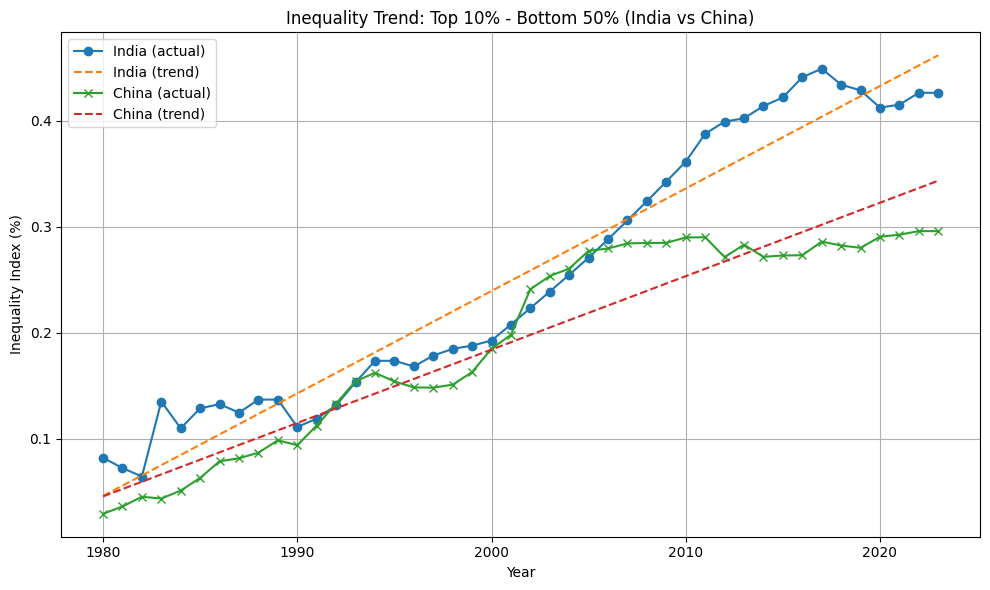

Slope of India Inequality Index: 0.0097
Slope of China Inequality Index: 0.0069


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load dataset
df = pd.read_csv('/content/WID_Data_IncomeShares.csv', sep=';', skiprows=1)

# Extract required columns
years = pd.to_numeric(df.iloc[:, 0], errors='coerce')
df = df.assign(year=years)

# Extract top 10% and bottom 50% income share for India and China
df_ineq = df[['year', 'sptinc_p90p100_z_IN', 'sptinc_p0p50_z_IN', 'sptinc_p90p100_z_CN', 'sptinc_p0p50_z_CN']].copy()

# Clean data
df_ineq.columns = ['year', 'IN_top10', 'IN_bottom50', 'CN_top10', 'CN_bottom50']
df_ineq = df_ineq.dropna()

# Convert to numeric
df_ineq['IN_top10'] = pd.to_numeric(df_ineq['IN_top10'], errors='coerce')
df_ineq['IN_bottom50'] = pd.to_numeric(df_ineq['IN_bottom50'], errors='coerce')
df_ineq['CN_top10'] = pd.to_numeric(df_ineq['CN_top10'], errors='coerce')
df_ineq['CN_bottom50'] = pd.to_numeric(df_ineq['CN_bottom50'], errors='coerce')

# Calculate inequality index = top10 - bottom50
df_ineq['India_inequality'] = df_ineq['IN_top10'] - df_ineq['IN_bottom50']
df_ineq['China_inequality'] = df_ineq['CN_top10'] - df_ineq['CN_bottom50']

# Linear regression
X = df_ineq[['year']]
model_IN = LinearRegression().fit(X, df_ineq[['India_inequality']])
model_CN = LinearRegression().fit(X, df_ineq[['China_inequality']])

# Predictions
df_ineq['India_trend'] = model_IN.predict(X)
df_ineq['China_trend'] = model_CN.predict(X)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_ineq['year'], df_ineq['India_inequality'], label='India (actual)', marker='o')
plt.plot(df_ineq['year'], df_ineq['India_trend'], label='India (trend)', linestyle='--')

plt.plot(df_ineq['year'], df_ineq['China_inequality'], label='China (actual)', marker='x')
plt.plot(df_ineq['year'], df_ineq['China_trend'], label='China (trend)', linestyle='--')

plt.title('Inequality Trend: Top 10% - Bottom 50% (India vs China)')
plt.xlabel('Year')
plt.ylabel('Inequality Index (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print slope (rate of increase in inequality)
print(f"Slope of India Inequality Index: {model_IN.coef_[0][0]:.4f}")
print(f"Slope of China Inequality Index: {model_CN.coef_[0][0]:.4f}")

The graph shows that the inequality index (measuring the gap between the top 10% and bottom 50%) has risen more sharply in India than in China from 1980 to 2023. The actual data for India (blue line) climbs faster and reaches higher levels than China’s (green line). The trend lines further confirm this: India’s trend line (orange dashed) has a steeper slope (0.0097) compared to China’s (red dashed, slope 0.0069). This means that, over time, inequality has increased at a faster rate in India than in China, supporting the hypothesis that India has experienced a steeper rise in inequality compared to China.

### **Hypothesis 3:** In countries where women earn more, the bottom 50% also holds more wealth.

For this, we looked for correlation between Female income share (by country and year) and Bottom 50% income share (same country/year)

In [ ]:
!pip install openpyxl

In [ ]:
# Load the data
female_share_df = pd.read_excel('./female_share.xlsx', sheet_name='Data')
bottom50_df = pd.read_excel('./bottom50.xlsx', sheet_name='Data')
print(female_share_df.head())
print(bottom50_df.head())



   Year     USA  France  Germany   India   China  Brazil  South Africa  \
0  1990  0.3315  0.3524   0.2915  0.1450  0.3682  0.2784        0.3368   
1  1991  0.3413  0.3524   0.3028  0.1450  0.3682  0.2784        0.3368   
2  1992  0.3443  0.3524   0.3000  0.1450  0.3682  0.2784        0.3368   
3  1993  0.3402  0.3524   0.3070  0.1450  0.3682  0.2784        0.3368   
4  1994  0.3393  0.3524   0.3072  0.1479  0.3682  0.2784        0.3368   

    Japan  Sweden  Australia     World  
0  0.2332  0.3872     0.3354  0.278391  
1  0.2332  0.3872     0.3354  0.278831  
2  0.2332  0.3872     0.3354  0.278579  
3  0.2332  0.3872     0.3354  0.278023  
4  0.2332  0.3872     0.3354  0.278109  
   Year     USA  France  Germany   India   China  Brazil  South Africa  Japan  \
0  1990  0.0170  0.0893      NaN     NaN  0.1601     NaN           NaN    NaN   
1  1991  0.0166  0.0872      NaN  0.0878  0.1601     NaN           NaN    NaN   
2  1992  0.0139  0.0780      NaN     NaN  0.1601     NaN          

In [ ]:
print(female_share_df.isnull().sum())
print(bottom50_df.isnull().sum())


Year            0
USA             0
France          0
Germany         0
India           0
China           0
Brazil          0
South Africa    0
Japan           0
Sweden          0
Australia       0
World           0
dtype: int64
Year            0
USA             0
France          0
Germany         4
India           4
China           0
Brazil          5
South Africa    3
Japan           5
Sweden          5
Australia       5
World           5
dtype: int64


In [ ]:
# Melt both datasets
female_melted = female_share_df.melt(id_vars='Year', var_name='Country', value_name='FemaleShare')
bottom50_melted = bottom50_df.melt(id_vars='Year', var_name='Country', value_name='Bottom50Share')

# Merge them
combined_df = pd.merge(female_melted, bottom50_melted, on=['Year', 'Country'])

combined_df.head()

,Year,Country,FemaleShare,Bottom50Share
0,1990,USA,0.3315,0.0170
1,1991,USA,0.3413,0.0166
2,1992,USA,0.3443,0.0139
3,1993,USA,0.3402,0.0134
4,1994,USA,0.3393,0.0115


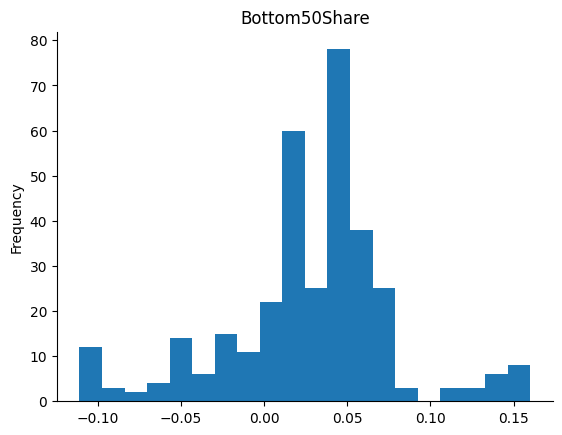

In [ ]:
# @title Bottom50Share

from matplotlib import pyplot as plt
combined_df['Bottom50Share'].plot(kind='hist', bins=20, title='Bottom50Share')
plt.gca().spines[['top', 'right',]].set_visible(False)

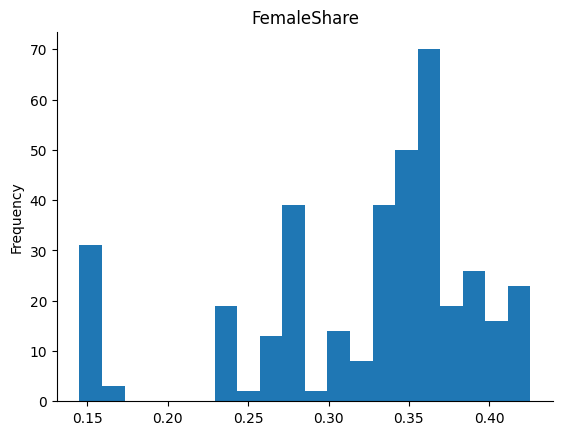

In [ ]:
# @title FemaleShare

from matplotlib import pyplot as plt
combined_df['FemaleShare'].plot(kind='hist', bins=20, title='FemaleShare')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
print(combined_df.isnull().sum())
combined_df.to_excel("combined_df.xlsx", index=False)

Year              0
Country           0
FemaleShare       0
Bottom50Share    36
dtype: int64


In [ ]:
# Interpolate missing Bottom50Share values per country (optional!)
combined_df['Bottom50Share'] = (
    combined_df.sort_values(['Country', 'Year'])
               .groupby('Country')['Bottom50Share']
               .transform(lambda group: group.interpolate())   #takes average of the two adjacent values
)
print(combined_df.isnull().sum())

Year              0
Country           0
FemaleShare       0
Bottom50Share    32
dtype: int64


In [ ]:
combined_df.to_excel("cleaned_combined_df.xlsx", index=False)
# After Analysis, many countries are missing data for the early years like 1990–1994, it’s totally reasonable to drop those years across the board.
# Drop rows where Year is between 1990 and 1994 (inclusive)
combined_df = combined_df[~combined_df['Year'].between(1990, 1994)]
combined_df.to_excel("final_df.xlsx", index=False)


##### Final Dataset to use = final.df

####  Insights on the data

In [ ]:
# Overall correlation how strongly the two variables are related across all countries and years.
overall_corr = combined_df[['FemaleShare', 'Bottom50Share']].corr().iloc[0, 1]
print(f"Overall correlation between FemaleShare and Bottom50Share: {overall_corr:.3f}")


Overall correlation between FemaleShare and Bottom50Share: -0.354


The overall correlation between FemaleShare and Bottom50Share is -0.354, indicating a weak negative relationship: as women’s income share rises, the bottom 50% share tends to fall. Thus, the hypothesis that “countries where women earn more, the bottom 50% also holds more wealth” is not broadly supported.


In [ ]:
# Correlation per country
# which countries follow the hypothesis more closely.
country_corr = (
    combined_df.groupby('Country')[['FemaleShare', 'Bottom50Share']]
    .corr()
    .iloc[0::2, -1]  # select only correlation values between the two variables
    .reset_index()
    .rename(columns={'Bottom50Share': 'Correlation'})
)

country_corr_sorted = country_corr.sort_values('Correlation', ascending=False)
print(country_corr_sorted)

         Country      level_1  Correlation
2          China  FemaleShare     0.973977
10         World  FemaleShare     0.643663
5          India  FemaleShare     0.137550
7   South Africa  FemaleShare    -0.014148
1         Brazil  FemaleShare    -0.204041
9            USA  FemaleShare    -0.248938
4        Germany  FemaleShare    -0.440539
6          Japan  FemaleShare    -0.445965
8         Sweden  FemaleShare    -0.805066
3         France  FemaleShare    -0.870308
0      Australia  FemaleShare    -0.895147


Country-wise, China and the world average show positive correlations, supporting the hypothesis, while India shows a weak positive link. Most other countries, including progressive ones, display negative correlations, contradicting the hypothesis.


##### Inferences
- Other factors like tax systems, labor dyamics may also affect the bottom 50% income share independently of gender income equality.

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import plotly.io as pio
pio.renderers.default = 'browser'


# Create an empty list to collect individual country figures
figs = []

# Loop through each country and create a subplot
for country in combined_df['Country'].unique():
    df_country = combined_df[combined_df['Country'] == country]

    # Fit a regression line
    coef = np.polyfit(df_country['FemaleShare'], df_country['Bottom50Share'], 1)
    poly1d_fn = np.poly1d(coef)

    # Create scatter + line
    fig = go.Figure()

    fig.add_trace(go.Scatter(
        x=df_country['FemaleShare'],
        y=df_country['Bottom50Share'],
        mode='markers',
        name='Data',
        marker=dict(size=8, color='blue'),
        hovertemplate='Female: %{x}<br>Bottom 50%: %{y}<extra></extra>'
    ))

    fig.add_trace(go.Scatter(
        x=df_country['FemaleShare'],
        y=poly1d_fn(df_country['FemaleShare']),
        mode='lines',
        name='Trend',
        line=dict(color='black', width=2, dash='dash')
    ))

    # Update layout
    fig.update_layout(
        title=f'{country}: Female Share vs Bottom 50% Share',
        xaxis_title='Female Income Share',
        yaxis_title='Bottom 50% Income Share',
        template='plotly_white',
        height=500,
        width=700
    )

    figs.append(fig)


for fig in figs:
    fig.show(renderer = "colab")


<ipython-input-29-74792f54552c>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




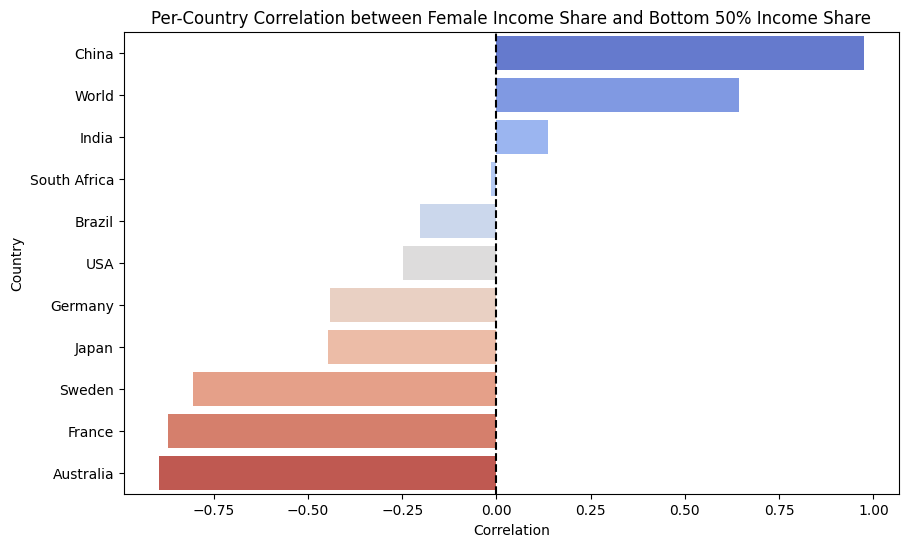

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=country_corr_sorted, x='Correlation', y='Country', palette='coolwarm')
plt.title('Per-Country Correlation between Female Income Share and Bottom 50% Income Share')
plt.axvline(0, color='black', linestyle='--')
plt.show()


In [ ]:
!pip install statsmodels

##### Modeling the relationship between Female Share and Bottom 50 % Share across different countries

In [ ]:
import statsmodels.api as sm

# Define independent (X) and dependent (y) variables
X = combined_df['FemaleShare']
y = combined_df['Bottom50Share']

# Add constant term for intercept
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Show the summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          Bottom50Share   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     45.34
Date:                Tue, 22 Apr 2025   Prob (F-statistic):           7.79e-11
Time:                        22:32:08   Log-Likelihood:                 530.83
No. Observations:                 319   AIC:                            -1058.
Df Residuals:                     317   BIC:                            -1050.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1043      0.012      8.596      

Regression results confirm this: the coefficient for FemaleShare is -0.2434 (p < 0.001), meaning higher female income share predicts a lower bottom 50% share. However, the model explains only 12.5% of the variation.

#### Negative Results for Hypothesis

The regression results show a surprising **negative relationship** between female labor income share and bottom 50% income share (coefficient of -0.2434), suggesting that as women's share of labor income increases, the share held by the bottom half of the population decreases.

#### Potential reasons :     
Possible reasons include non-causal relationships, country-specific factors, and the prevalence of women in informal, low-paid sectors, which may limit gains for the bottom half despite higher female participation.

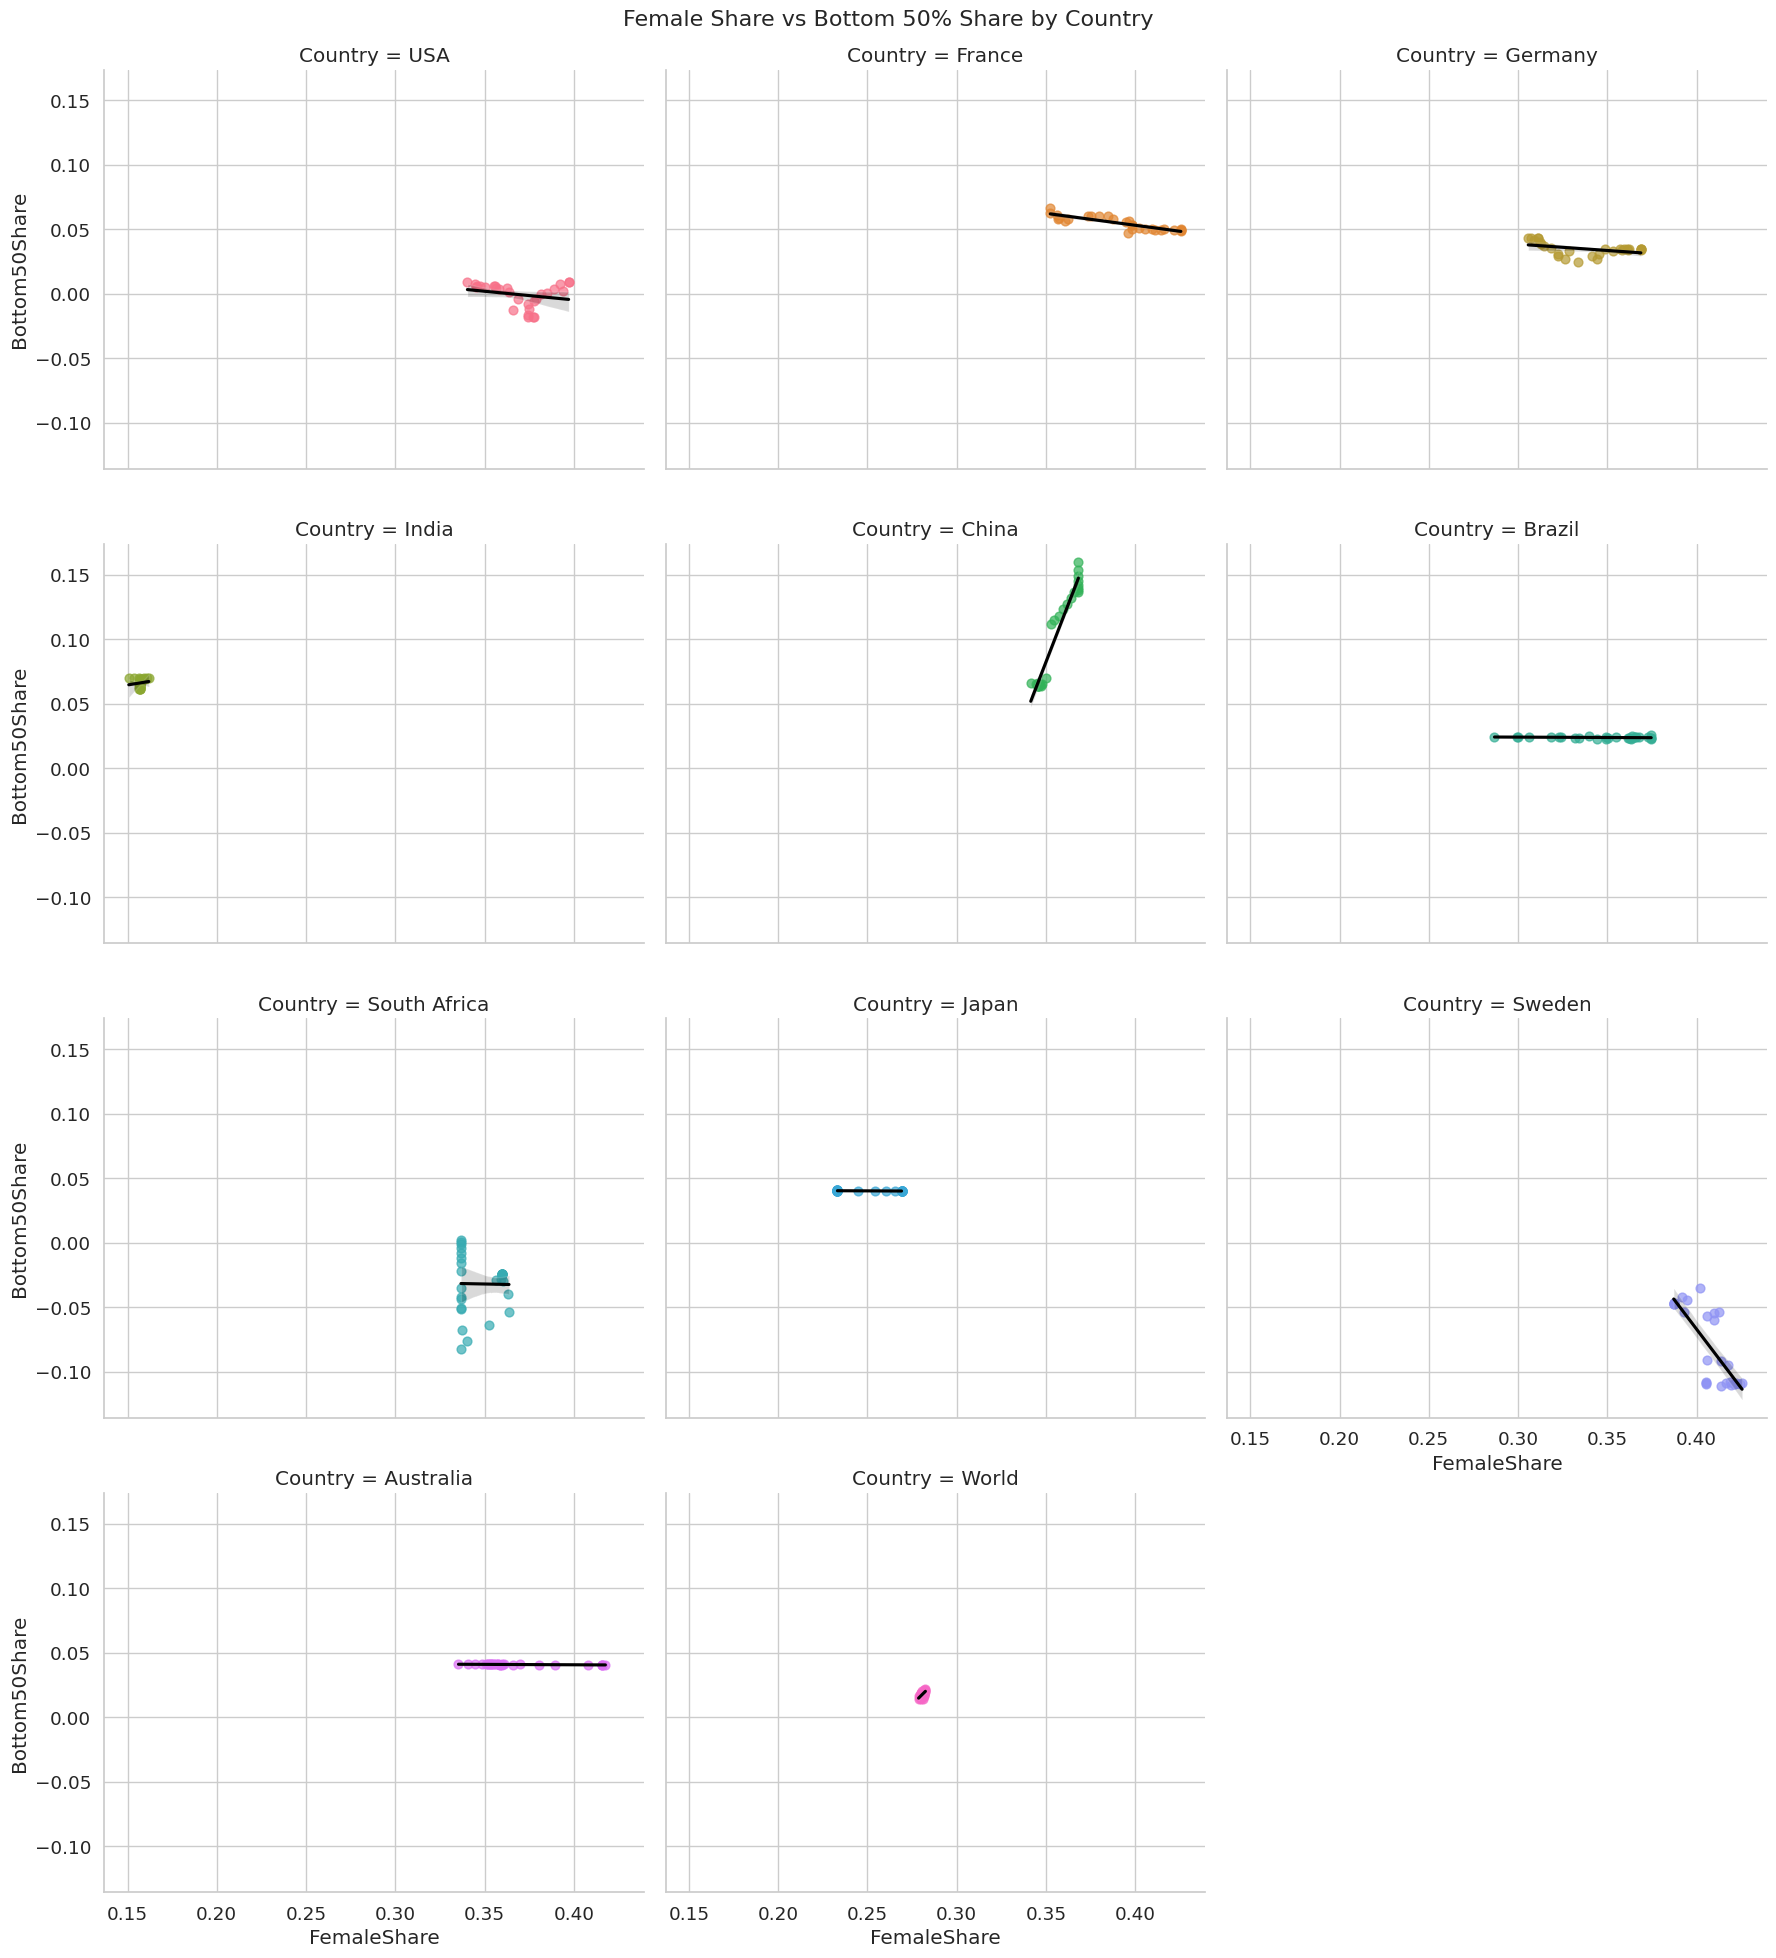

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set(style="whitegrid", palette="muted", font_scale=1.2)

# Create scatter plot with linear regression lines for each country
g = sns.lmplot(
    data=combined_df,
    x='FemaleShare',
    y='Bottom50Share',
    hue='Country',
    col='Country',
    col_wrap=3,         # Adjust this to control how many plots per row
    height=5,
    aspect=1.2,
    markers='o',
    scatter_kws={'s': 40, 'alpha': 0.7},
    line_kws={'color': 'black'}
)

# Adjust overall figure size
g.fig.set_size_inches(18, 20)  # Width, Height in inches

g.fig.subplots_adjust(top=0.95)
g.fig.suptitle('Female Share vs Bottom 50% Share by Country', fontsize=16)

plt.show()


#### Graph Analysis
**Upward Sloping Lines :** Support the Hypothesis (positive realtionship)

**Downward Sloping Lines :** Contradict the hypothesis (negative relationship)

**Flat or Scattered :** Denotes weak or no relationship

## **Conclusion**

Global inequality manifests across income, wealth, gender, and environmental dimensions. While advanced economies exhibit moderated inequality through progressive policies, emerging nations face compounding challenges.

**Hypothesis 1 (Income inequality has increased globally over time)** is strongly supported by longitudinal evidence showing the global top 10% income share rising and bottom 50 % declining.

**Hypothesis 2 (India has seen steeper rise in inequality than China)** as India has been a developing nation throughout these years continuously implementing progressive policies.

**Hypothesis 3 (In countries where women earn more, the bottom 50% also holds more wealth)** presents a more complex picture. While Sweden, France, and Australia show both high female labor income shares (40-43%) and relatively better bottom 50% wealth shares, regression analysis revealed a counterintuitive negative correlation (-0.2434 coefficient) between these measures.

The link between gender equity and wealth distribution highlights the need for inclusive growth strategies. Addressing these interconnected disparities requires targeting wealth concentration, empowering marginalized groups, and aligning climate action with equity goals.

In [6]:
!jupyter nbconvert --to html --template lab Writing_Assign.ipynb --output index.html


[NbConvertApp] WARNING | pattern 'Writing_Assign.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
